In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#load dataset
df= pd.read_csv("retail_sales_dataset.csv")
df.sample(5)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
99,100,2023-06-16,CUST100,Male,41,Electronics,1,30,30
638,639,2023-05-13,CUST639,Female,62,Beauty,4,50,200
696,697,2023-01-15,CUST697,Male,53,Clothing,1,500,500
522,523,2023-09-24,CUST523,Female,62,Electronics,1,300,300
407,408,2023-04-15,CUST408,Female,64,Beauty,1,500,500


In [5]:
df.isna().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [7]:
#convert Date to Date datatype
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
#search for duplicate rows
df.duplicated().sum()

0

In [9]:
#verify the values in total amount have been calculated as Price per unit * Quantity
df['Total Amount (Recalc)'] = df['Quantity'] * df['Price per Unit']

In [12]:
df['Total Amount (Recalc)'].equals(df['Total Amount'])

True

In [14]:
#drop ['Total Amount (Recalc)'] since the calculations were correct and now wehave 2 columns with the same values
df = df.drop(columns=['Total Amount (Recalc)'], errors='ignore')

In [15]:
#RFM Metrics
#Recency- Day since last purchase
#Frequency- Total transactions by customer
#Monetary- Total amount of money soent by customer

In [16]:
# Define reference date (latest transaction in dataset)
reference_date = df['Date'].max()

In [17]:
# Compute RFM metrics
rfm = df.groupby('Customer ID').agg({
    'Date': lambda x: (reference_date - x.max()).days,  # Recency
    'Transaction ID': 'count',  # Frequency
    'Total Amount': 'sum'  # Monetary
}).reset_index()


In [18]:
# Rename columns
rfm.columns = ['Customer ID', 'Recency', 'Frequency', 'Monetary']

In [24]:
# Assign scores using a 1-5 scale
rfm['R_Score'] = pd.qcut(rfm['Recency'], q=5, labels=[5, 4, 3, 2, 1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), q=5, labels=[1, 2, 3, 4, 5])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], q=5, labels=[1, 2, 3, 4, 5])

In [25]:
# Compute RFM score
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

# Display results
rfm.sample(7)

,Customer ID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
577,CUST577,322,1,2000,1,3,5,135
140,CUST140,149,1,30,3,1,1,311
822,CUST822,223,1,150,3,5,3,353
196,CUST196,93,1,900,4,1,4,414
663,CUST663,287,1,1200,2,4,5,245
423,CUST423,299,1,25,1,3,1,131
317,CUST317,336,1,90,1,2,2,122


In [27]:
#verify that all customers are one time buyers
print(rfm['Frequency'].value_counts())


Frequency
1    1000
Name: count, dtype: int64


In [29]:
rfm['F Score'] = 1  # Since all customers are one-time buyers,assign 1 as the Fscore Metric
rfm.sample(7)

,Customer ID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,F Score
880,CUST880,133,1,1000,4,5,4,454,1
567,CUST567,201,1,900,3,3,4,334,1
120,CUST120,239,1,50,2,1,1,211,1
759,CUST759,177,1,100,3,4,2,342,1
889,CUST889,91,1,50,4,5,1,451,1
271,CUST271,192,1,120,3,2,3,323,1
696,CUST696,117,1,200,4,4,3,443,1


In [30]:
# drop previous F_score column
rfm = rfm.drop(columns=['F_Score'], errors='ignore')

In [31]:
#rename F Score to F_Score for uniformity
rfm.rename(columns={'F Score': 'F_Score'}, inplace=True)


In [32]:
#good customers have - High R_Score & High M_Score
#Low recency value- most recent purchase-high R Score

In [36]:
#recalculate RFM score
rfm['RFM Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)
rfm = rfm.drop(columns=['RFM_Score'], errors='ignore')


In [37]:
rfm.rename(columns={'RFM Score': 'RFM_Score'}, inplace=True)

In [38]:
rfm.sample(7)

,Customer ID,Recency,Frequency,Monetary,R_Score,M_Score,F_Score,RFM_Score
531,CUST531,25,1,500,5,4,1,514
497,CUST497,91,1,120,4,3,1,413
912,CUST912,342,1,150,1,3,1,113
915,CUST915,216,1,90,3,2,1,312
424,CUST424,39,1,1200,5,5,1,515
303,CUST303,364,1,90,1,2,1,112
162,CUST162,133,1,60,4,2,1,412


In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score



In [61]:
# Select relevant features
X = rfm[['Recency', 'Frequency', 'Monetary']]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  


In [68]:
# Apply K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(X_scaled)



C:\Users\elitebook\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [69]:
# Calculate silhouette score
silhouette_avg = silhouette_score(X_scaled, rfm['Cluster'])
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.5150453731777653


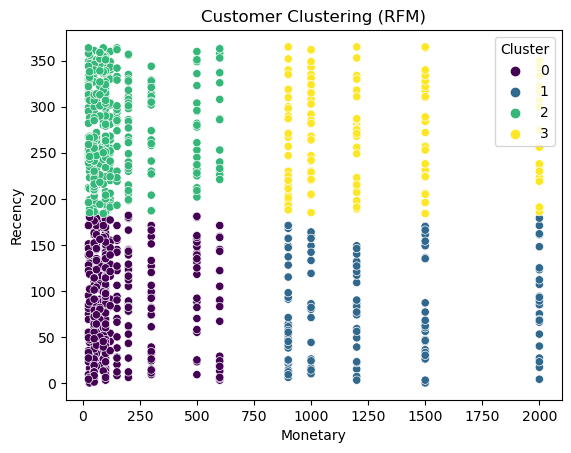

In [77]:
sns.scatterplot(x=rfm['Monetary'], y=rfm['Recency'], hue=rfm['Cluster'], palette='viridis')
plt.title('Customer Clustering (RFM)')
plt.show()

In [79]:
rfm_summary = rfm.groupby('Cluster')[['Recency', 'Monetary']].mean().sort_values(by='Monetary', ascending=False)
print(rfm_summary)

            Recency     Monetary
Cluster                         
1         83.935484  1313.709677
3        269.521429  1283.571429
0         91.116216   159.770270
2        273.573770   148.319672


In [80]:
#0 -Low-Value Recent Buyers – They purchased recently but spent little. Upselling and personalized offers could help.
#1 -High-Value Recent Buyers – These customers bought recently and spent a lot. Great targets for loyalty programs.
#2 -Low-Value Churned Buyers – They bought long ago and spent little. Least likely to return.
#3 -High-Value Churned Buyers – They spent a lot but haven't purchased in a long time. Good candidates for re-engagement.

In [81]:
cluster_labels = {
    1: 'High-Value Recent Buyers',
    3: 'High-Value Churned Buyers',
    0: 'Low-Value Recent Buyers',
    2: 'Low-Value Churned Buyers'
}

rfm['Segment'] = rfm['Cluster'].map(cluster_labels)

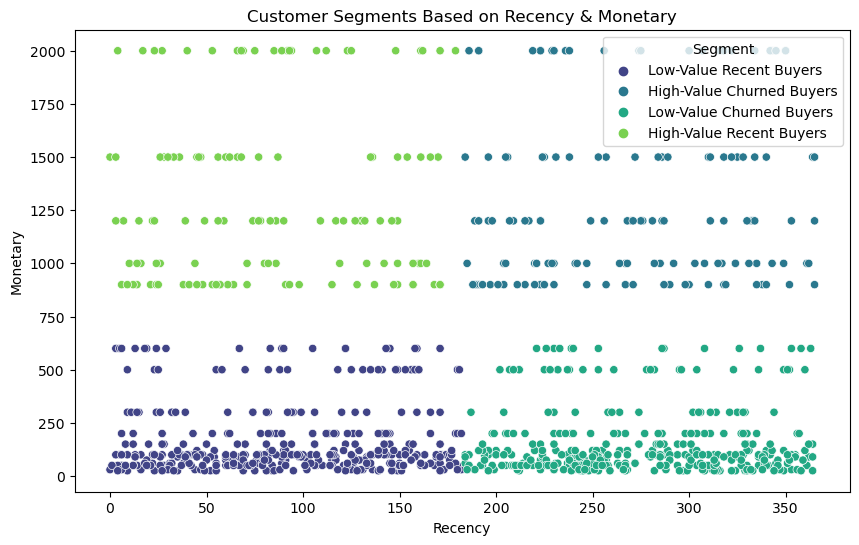

In [82]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Segment', palette='viridis')
plt.title('Customer Segments Based on Recency & Monetary')
plt.show()
